In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
# import title basic
title_basics = pd.read_csv('./test-data/title.basics.tsv', sep='\t', na_values=['\\N'], usecols=['tconst', 'titleType', 'primaryTitle', 'startYear', 'genres'])
title_basics.head()

,tconst,titleType,primaryTitle,startYear,genres
0,tt0000001,short,Carmencita,1894.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,1892.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,1892.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,1892.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,1893.0,"Comedy,Short"


In [53]:
# import title rating
title_ratings = pd.read_csv('./test-data/title.ratings.tsv', sep='\t', na_values=['\\N'], usecols=['tconst', 'averageRating'])
title_ratings.head()


,tconst,averageRating
0,tt0000001,5.7
1,tt0000002,5.8
2,tt0000003,6.5
3,tt0000004,5.6
4,tt0000005,6.2


In [54]:
# import title principals
title_principals = pd.read_csv('./test-data/title.principals.tsv', sep='\t', na_values=['\\N'], usecols=['tconst', 'nconst', 'category'])
title_principals.head()

,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0374658,cinematographer
3,tt0000002,nm0721526,director
4,tt0000002,nm1335271,composer


In [55]:
# import name basic
name_basics = pd.read_csv('./test-data/name.basics.tsv', sep='\t', na_values=['\\N'], usecols=['nconst', 'primaryName', 'primaryProfession'])
name_basics['primaryProfession'] = name_basics['primaryProfession'].fillna('')
name_basics = name_basics[name_basics['primaryProfession'].str.contains('actor')]
name_basics.head()

,nconst,primaryName,primaryProfession
0,nm0000001,Fred Astaire,"soundtrack,actor,miscellaneous"
3,nm0000004,John Belushi,"actor,soundtrack,writer"
4,nm0000005,Ingmar Bergman,"writer,director,actor"
6,nm0000007,Humphrey Bogart,"actor,soundtrack,producer"
7,nm0000008,Marlon Brando,"actor,soundtrack,director"


In [56]:
merged = title_basics.merge(title_ratings, on='tconst').merge(title_principals, on='tconst').merge(name_basics, on='nconst')
merged.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,nconst,category,primaryName,primaryProfession
0,tt0000005,short,Blacksmith Scene,1893.0,"Comedy,Short",6.2,nm0443482,actor,Charles Kayser,actor
1,tt0000005,short,Blacksmith Scene,1893.0,"Comedy,Short",6.2,nm0653042,actor,John Ott,actor
2,tt0000007,short,Corbett and Courtney Before the Kinetograph,1894.0,"Short,Sport",5.4,nm0179163,actor,James J. Corbett,"actor,writer"
3,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897.0,"Documentary,News,Sport",5.3,nm0179163,self,James J. Corbett,"actor,writer"
4,tt0011603,movie,The Prince of Avenue A,1920.0,Drama,3.4,nm0179163,actor,James J. Corbett,"actor,writer"


Looking for Tom Cruise acting in an Actions flim, what rating can I expect?

<Axes: >

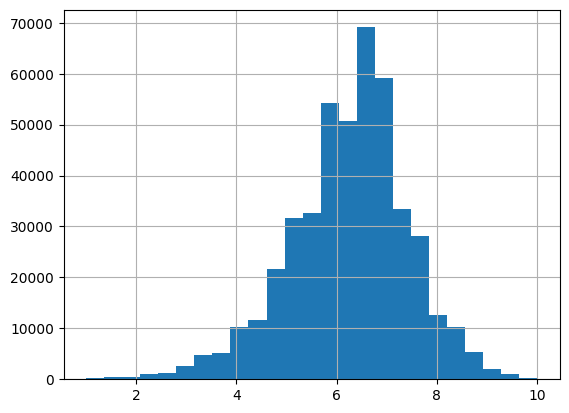

In [57]:
drama_movies = merged[(merged['titleType'] == 'movie') & (merged['genres'].str.contains('Drama'))]
drama_movies["averageRating"].hist(bins=25)

In [58]:
merged = merged.drop('tconst', axis=1)
merged = merged.drop('nconst', axis=1)
merged = merged.drop('titleType', axis=1)
merged = merged.drop('primaryTitle', axis=1)
# merged = merged.isna().sum()
X = merged.drop('averageRating', axis=1)
y = merged['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'Comedy,Family'